In [219]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set('talk')
sns.set_style('white')

In [220]:
path = pathlib.Path("data_dir/")

In [221]:
def extract_params(f):
    parts = f.name.split('_')
    params = {}
    for i in range(0, len(parts), 2):
        params[parts[i]] = float(parts[i+1])
    return params


In [222]:
data = []
for f in path.glob("rank*"):
    mrr = float((f / 'mrr.txt').read_text())
    params = extract_params(f)
    params['mrr'] = mrr
    data. append(params)
df = pd.DataFrame(data)
df.sort_values('mrr', ascending=False).head()

,rank,it,lambda,alpha,mrr
131,500.0,10.0,0.10000,1.0,0.767216
122,500.0,10.0,0.10000,2.0,0.725186
0,500.0,10.0,0.00000,100.0,0.678645
218,500.0,10.0,0.00001,100.0,0.677591
209,500.0,10.0,0.00100,100.0,0.665000


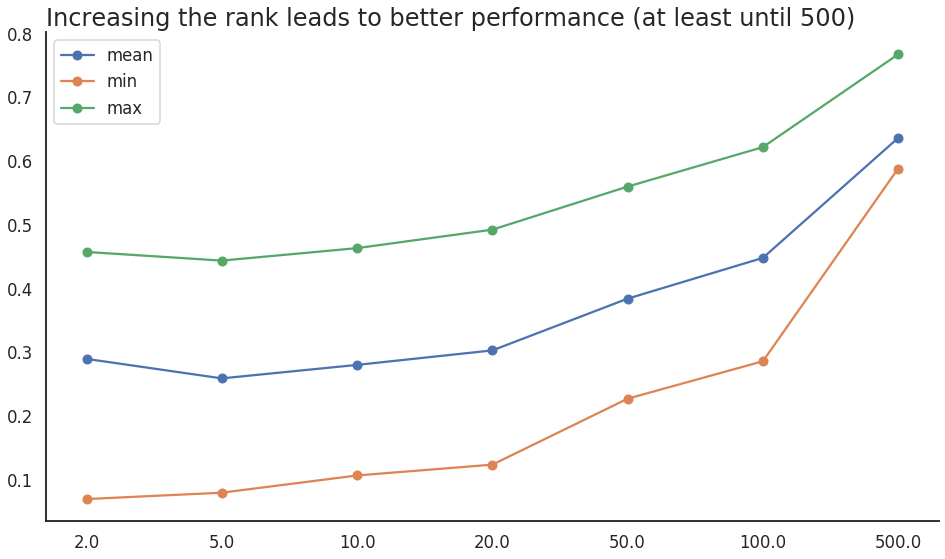

In [224]:
def plot_by_property(df, prop, title=''):
    fig, ax = plt.subplots(figsize=(16,9))
    sns.despine(fig)
    mean_by_rank = df.groupby(prop).mean()['mrr']
    min_by_rank = df.groupby(prop).min()['mrr']
    max_by_rank = df.groupby(prop).max()['mrr']
    ax.plot(np.arange(mean_by_rank.shape[0]), mean_by_rank.values, 'o-', label='mean')
    ax.plot(np.arange(mean_by_rank.shape[0]), min_by_rank.values, 'o-', label='min')
    ax.plot(np.arange(mean_by_rank.shape[0]), max_by_rank.values, 'o-', label='max')
    ax.set_xticklabels([0] + mean_by_rank.index.tolist())
    ax.legend()
    if title:
        ax.set_title(title,size =24, loc='left')
plot_by_property(df, 'rank', 'Increasing the rank leads to better performance (at least until 500)')

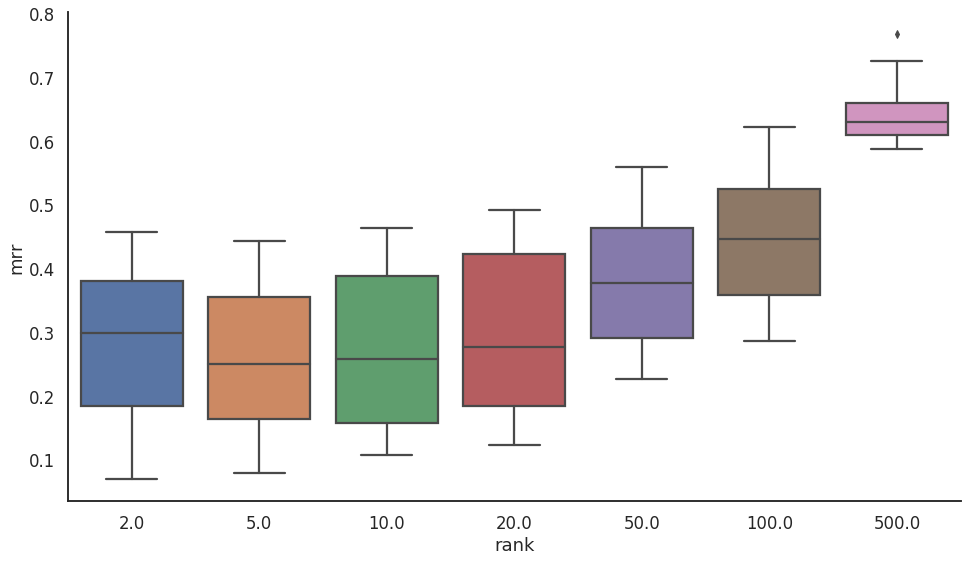

In [231]:
fig, ax = plt.subplots(figsize=(16,9))
sns.despine(fig)
sns.boxplot(x='rank', y='mrr', data=df)

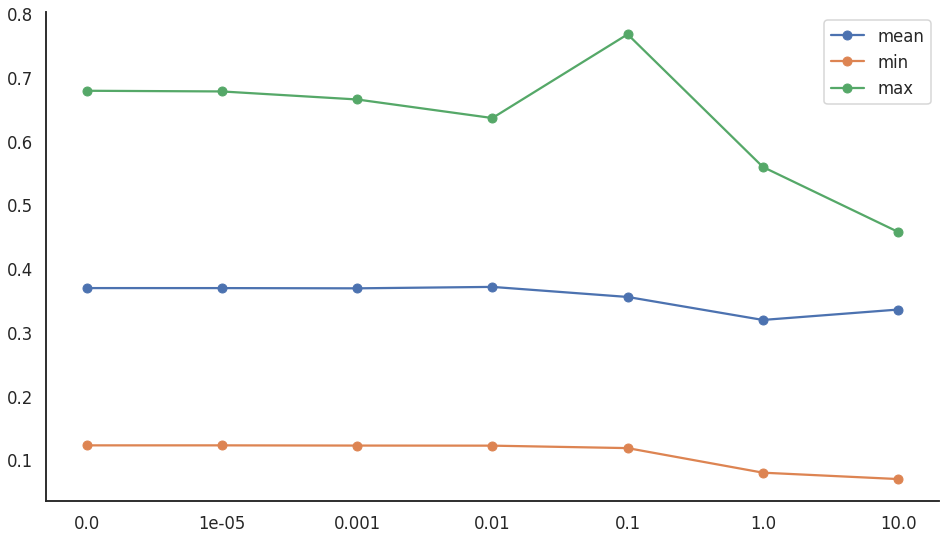

In [226]:
plot_by_property(df, 'lambda', title="")

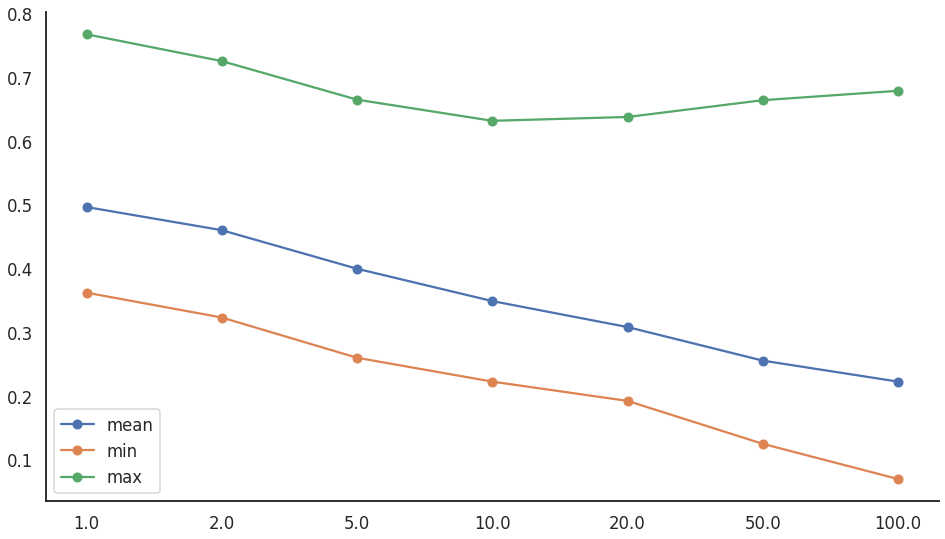

In [227]:
plot_by_property(df, 'alpha')

In [205]:
p = df.pivot_table(values='mrr', index=['lambda'], columns=['alpha'], aggfunc='max')
p.sort_index()

alpha,1.0,2.0,5.0,10.0,20.0,50.0,100.0
lambda,,,,,,,
0.00000,0.621598,0.594823,0.607638,0.620964,0.637561,0.663872,0.678645
0.00001,0.621632,0.594697,0.607158,0.620394,0.637130,0.663817,0.677591
0.00100,0.619164,0.598485,0.609737,0.613224,0.633198,0.653816,0.665000
0.01000,0.626463,0.628036,0.627174,0.631516,0.629252,0.631584,0.635859
0.10000,0.767216,0.725186,0.490261,0.445423,0.401240,0.339763,0.297273
1.00000,0.552808,0.559127,0.524246,0.470363,0.421070,0.358309,0.327020
10.00000,0.457211,0.455563,0.438798,0.444394,0.432326,0.381503,0.320293


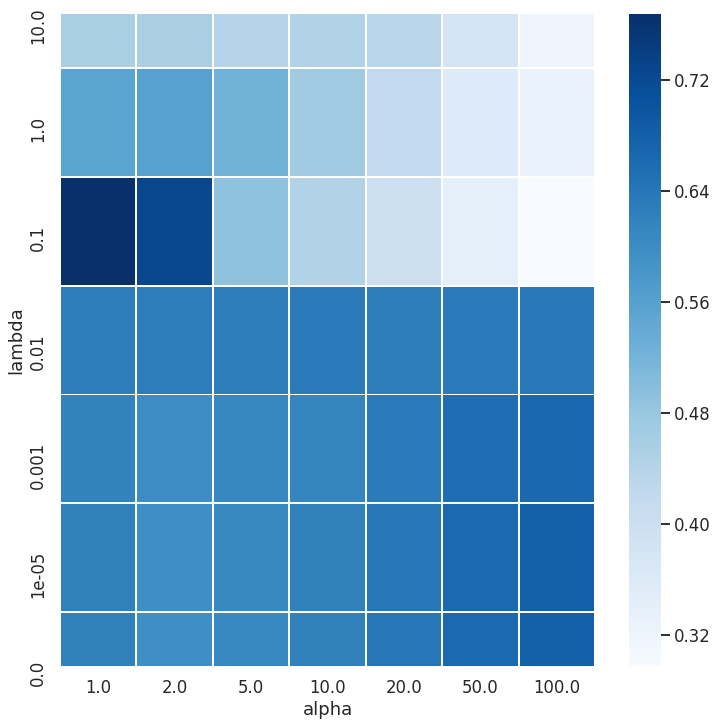

In [206]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(p.sort_index(ascending=False), cmap='Blues',linewidths=1)